
len of last x: 23   [57, 16, -6, -30, -84, -129, -154, -154, -145, -149, -157, -170, -183, -183, -188, -191, -161, -114, -76, -71, -77, -75, -70]

w:
 [-3.14159265 -3.1410704  -3.14054815 ...  3.14054815  3.1410704
  3.14159265]


<IPython.core.display.Javascript object>


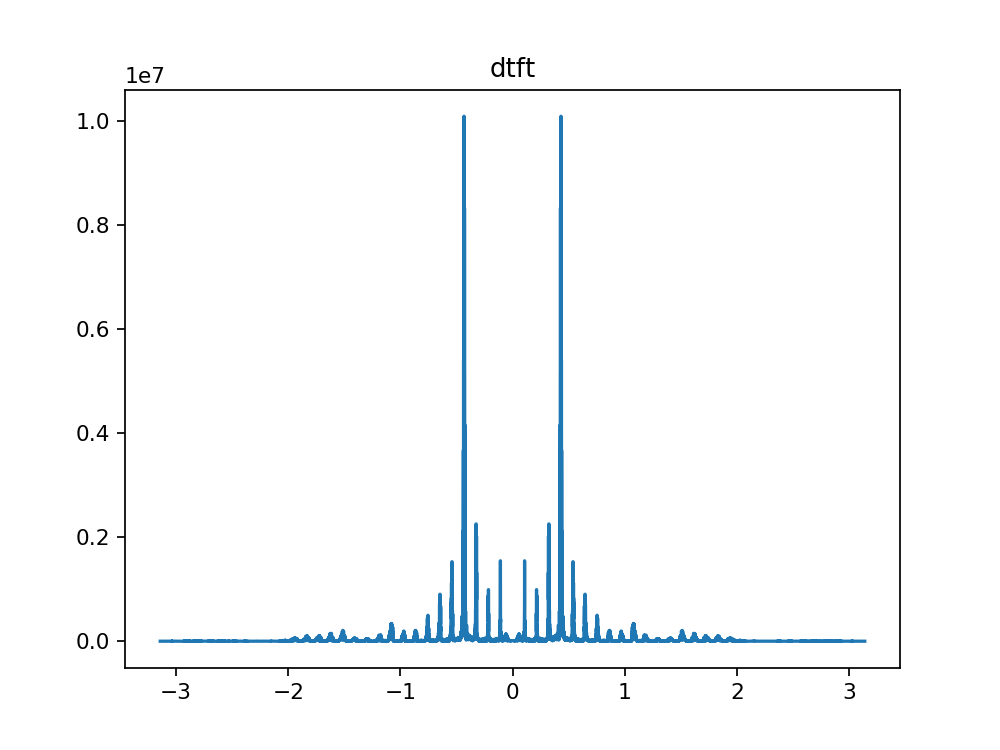

<IPython.core.display.Javascript object>


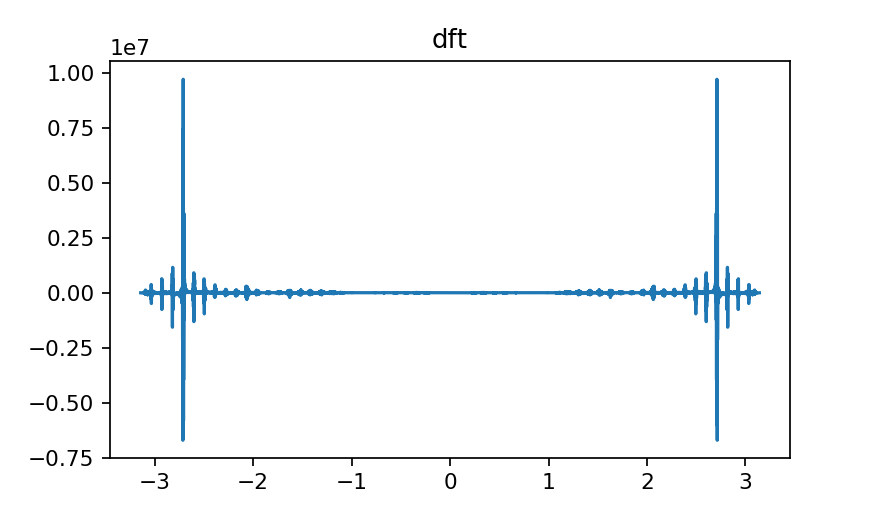

<IPython.core.display.Javascript object>


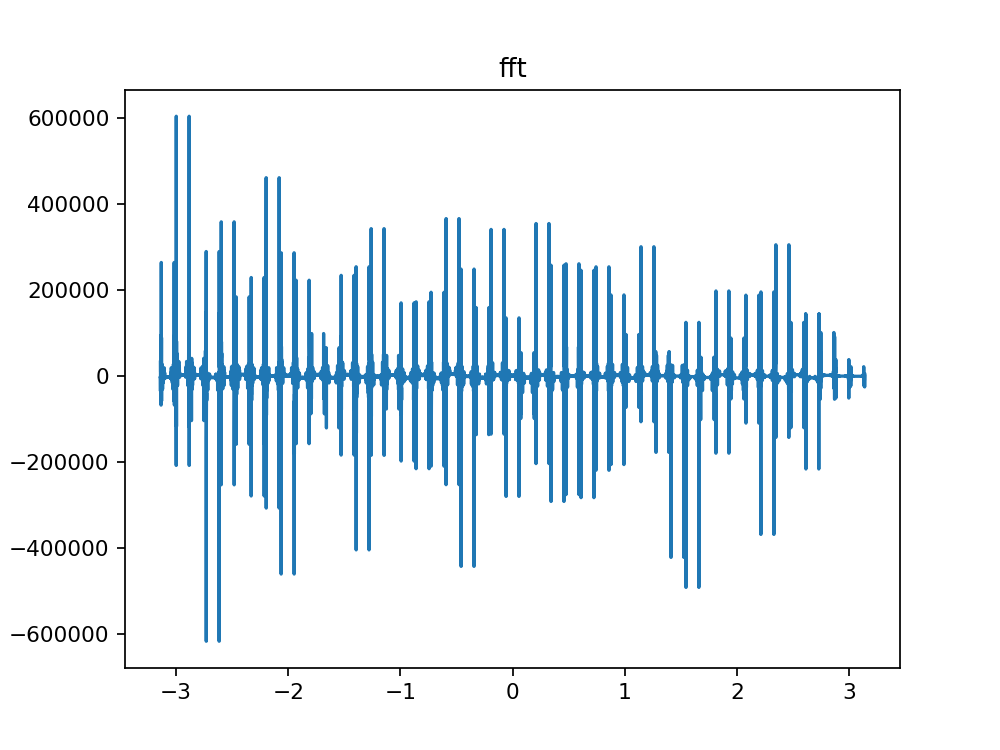

In [2]:
from cmath import exp, pi
import matplotlib.pyplot as plt
%matplotlib notebook
from numpy.fft import fftfreq
import numpy as np
import mpmath as mp
import math
import scipy
import scipy.stats as sp
import matplotlib.pyplot as plt
import subprocess
import cmath as cm
x=[]
y=[]
x1=[]

def dtft(x1,N):

    x=x1[0]
    j=cm.sqrt(-1)
    n=x1[1]
    X=[]

    w=np.linspace(-np.pi,np.pi,N)

    for i in range(0,N):
        w_tmp=w[i]
        X_tmp=0
        for k in range(0,len(x)):
            X_tmp+=(x[k]*np.exp(-n[k]*w_tmp*j))


        X.append(abs(X_tmp))
    #print("lenX:",len(X))
    return w,X


def fft(x1):
    N = len(x1)
    if N <= 1: return x1
    even = fft(x1[0::2])
    odd =  fft(x1[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]

f = open("Aa.txt", "r")
outf = open("AaFft.txt","w")
current_line=1
Nval=256
count=0
fs=[]
for line in f:
    x1.append(int(line))
for i in range(len(x1)):
    if count <Nval:
        x.append(x1[i])
        count=count+1
    else:
        for iter in fft(x):
            fs.append(iter)
        
        x=[]
        x.append(x1[i])
        count=1
#print("\nfs:",fs)
# print("\nlen of fs:",len(fs))

#print("\nx till 12032:",x1[:12032])
#print("\nlen of last x:",len(x)," ",x)
for i in range(len(x1)):
    y.append(i)
x2=[x1,y]
w,X=dtft(x2[:12032],12032)

plt.figure()
#plt.subplot(3,1,1)
plt.title('dtft')
plt.plot(w,X)
plt.show()


#w=np.linspace(-np.pi,np.pi,12032)
plt.figure()
#plt.subplot(3,1,3)
plt.title('fft')
plt.plot(w,fs,label='fft')
    
            

In [7]:
print("\n",fs[:5])
print("\n\n",samples[:5])


 [(-3730+0j), (-4119.412013510101-665.7896575288297j), (-4696.975016910693-5887.245629119728j), (-9230.91342578701-10650.04365124285j), (-34426.95777441988-29507.742506650226j)]


 [(-3766+0j), (-3784.7973421929064+322.13119109419085j), (-3817.4373856470825+669.7941620705667j), (-3973.41031512304+887.3567079137579j), (-4047.78180495489+1224.6647498728637j)]



lenfs: 12032


<IPython.core.display.Javascript object>


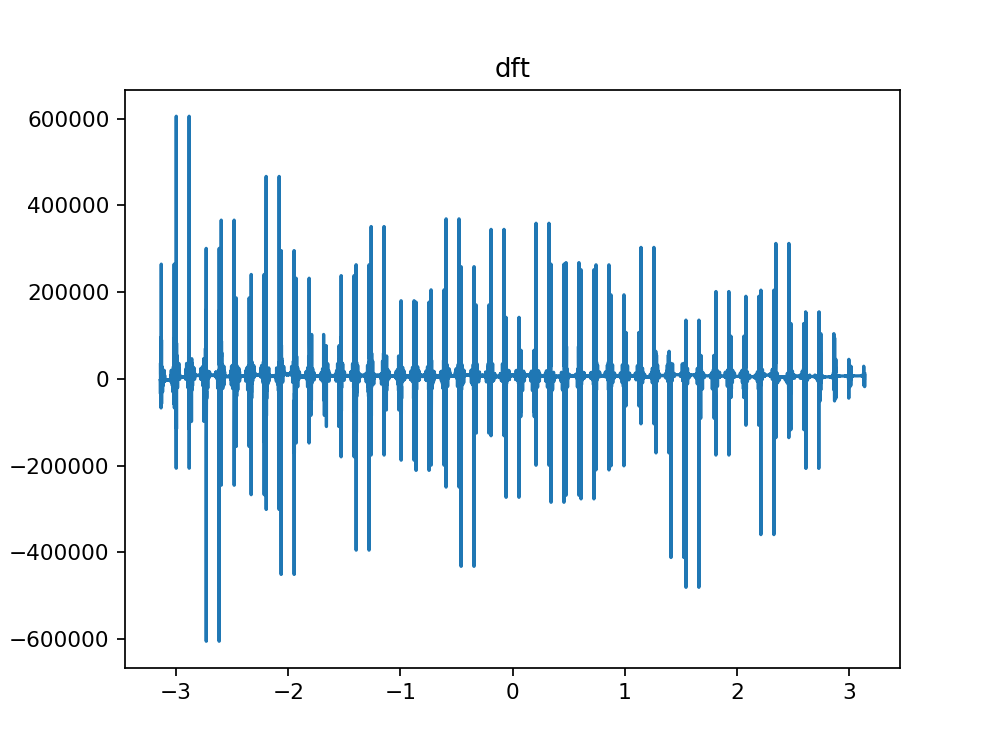

In [7]:
from cmath import exp, pi
import matplotlib.pyplot as plt
%matplotlib notebook
from numpy.fft import fftfreq
import numpy as np
import mpmath as mp
import math
import scipy
import scipy.stats as sp
import matplotlib.pyplot as plt
import subprocess
import cmath as cm 
x=[]
y=[]
x1=[]


def dft(x,N):
    samples=[]
    for k in range(N):
        list=[]
        a=0
        for n in range(N):
            a=x[n]*cm.exp(-2j*cm.pi*k*n*(1/N))
            list.append(a)
            a=0
        summation=sum(list)
        samples.append(summation)
    #print("\nThe samples are:-\n[")  
    #for i in range(N):
    #    print(samples[i]," ")
    #print("]")
    return samples

f = open("Aa.txt", "r")
outf = open("AaFft.txt","w")
current_line=1
Nval=256
count=0
dfs=[]
for line in f:
    x1.append(int(line))
for i in range(len(x1)):
    if count <Nval:
        x.append(x1[i])
        count=count+1
    else:
        samples=dft(x,Nval)
        for i in range(Nval):
            dfs.append(samples[i])
             
        x=[]
        x.append(x1[i])
        count=1
w=np.linspace(-np.pi,np.pi,len(dfs))
print("\nlenfs:",len(dfs))
plt.figure()
#plt.subplot(3,1,2)
plt.title('dft')
plt.plot(w,dfs,label='dft')